In [8]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv("../Disney_dataset/titles.csv")


In [2]:
# 데이터셋 구조 파악
print("데이터셋 크기:", df.shape)
print("열(변수)의 개수:", len(df.columns))
print("열의 이름:", df.columns)

데이터셋 크기: (1854, 15)
열(변수)의 개수: 15
열의 이름: Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')


In [3]:
# 데이터셋 살펴보기 (상위 5개 데이터 출력)
print("\n상위 5개 데이터:")
print(df.head())


상위 5개 데이터:
        id                                   title   type  \
0  tm89464                  Miracle on 34th Street  MOVIE   
1  tm61729  The Adventures of Ichabod and Mr. Toad  MOVIE   
2  tm61052                              Cinderella  MOVIE   
3  tm87946                                   Dumbo  MOVIE   
4  tm74391                                Fantasia  MOVIE   

                                         description  release_year  \
0  Kris Kringle, seemingly the embodiment of Sant...          1947   
1  The Wind in the Willows: Concise version of Ke...          1950   
2  Cinderella has faith her dreams of a better li...          1950   
3  Dumbo is a baby elephant born with over-sized ...          1941   
4  Walt Disney's timeless masterpiece is an extra...          1941   

  age_certification  runtime  \
0                 G       96   
1                 G       68   
2                 G       74   
3                 G       64   
4                 G      119   

       

In [4]:
# 기본적인 통계 분석
print("\n수치형 열의 기술 통계량:")
print(df.describe())


수치형 열의 기술 통계량:
       release_year      runtime     seasons   imdb_score    imdb_votes  \
count   1854.000000  1854.000000  540.000000  1339.000000  1.328000e+03   
mean    2006.193635    59.206580    2.618519     6.620687  6.961624e+04   
std       20.629561    38.566305    3.268281     1.066208  1.846213e+05   
min     1928.000000     1.000000    1.000000     1.600000  5.000000e+00   
25%     2002.000000    24.000000    1.000000     5.950000  3.267500e+02   
50%     2014.000000    48.000000    2.000000     6.700000  3.228000e+03   
75%     2020.000000    91.000000    3.000000     7.400000  3.273050e+04   
max     2023.000000   182.000000   36.000000     9.500000  1.403757e+06   

       tmdb_popularity   tmdb_score  
count      1839.000000  1708.000000  
mean         25.745671     6.817494  
std          79.389568     1.165990  
min           0.600000     2.000000  
25%           2.998500     6.217500  
50%           9.148000     6.873000  
75%          23.152500     7.500000  
max 

In [5]:
# 결측치 확인
print("\n결측치 개수:")
print(df.isnull().sum())


결측치 개수:
id                         0
title                      0
type                       0
description                9
release_year               0
age_certification        451
runtime                    0
genres                     0
production_countries       0
seasons                 1314
imdb_id                  478
imdb_score               515
imdb_votes               526
tmdb_popularity           15
tmdb_score               146
dtype: int64


In [6]:
# 범주형 열의 고유값 개수
print("\n범주형 열의 고유값 개수:")
for column in df.select_dtypes(include='object'):
    unique_values = df[column].nunique()
    print(f"{column}: {unique_values} unique values")


범주형 열의 고유값 개수:
id: 1854 unique values
title: 1814 unique values
type: 2 unique values
description: 1844 unique values
age_certification: 11 unique values
genres: 718 unique values
production_countries: 85 unique values
imdb_id: 1376 unique values


In [7]:
# 열간 상관관계
print("\n열간 상관관계:")
print(df.corr())


열간 상관관계:
                 release_year   runtime   seasons  imdb_score  imdb_votes  \
release_year         1.000000  0.016650 -0.316920    0.020105   -0.039026   
runtime              0.016650  1.000000  0.091813   -0.056332    0.425677   
seasons             -0.316920  0.091813  1.000000    0.054492    0.164229   
imdb_score           0.020105 -0.056332  0.054492    1.000000    0.263574   
imdb_votes          -0.039026  0.425677  0.164229    0.263574    1.000000   
tmdb_popularity      0.072248  0.143759  0.182105    0.098388    0.308815   
tmdb_score           0.068751 -0.100243  0.023725    0.480065    0.139903   

                 tmdb_popularity  tmdb_score  
release_year            0.072248    0.068751  
runtime                 0.143759   -0.100243  
seasons                 0.182105    0.023725  
imdb_score              0.098388    0.480065  
imdb_votes              0.308815    0.139903  
tmdb_popularity         1.000000    0.100453  
tmdb_score              0.100453    1.000000

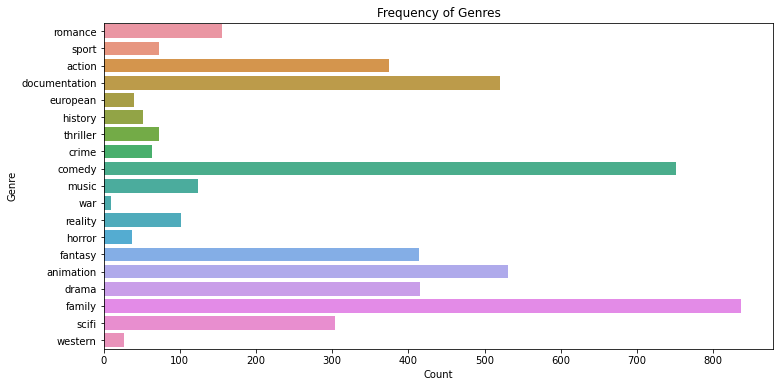

In [9]:
import re

# genre 열의 데이터를 쉼표를 기준으로 분리하여 알파벳만 남긴 문자열로 변환하여 합집합 만들기
genres = set()
for genre_list in df['genres']:
    if pd.notnull(genre_list):
        genres.update(re.findall(r'[a-zA-Z]+', genre_list))

# 각 문자열의 빈도수 계산
genre_counts = {genre: 0 for genre in genres}
for genre_list in df['genres']:
    if pd.notnull(genre_list):
        for genre in re.findall(r'[a-zA-Z]+', genre_list):
            genre = genre.lower()
            genre_counts[genre] += 1

# 빈도수 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=list(genre_counts.values()), y=list(genre_counts.keys()))
plt.title("Frequency of Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()